In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.optimize import minimize

$$ dX_t = \mu(\theta - X_t) dt +\sigma dW_t$$

In [2]:
np.random.seed(123)

theta =1
mu =1.5
sigma = 0.3

t =np.linspace(0,100,1001)
dt =t[1]-t[0]

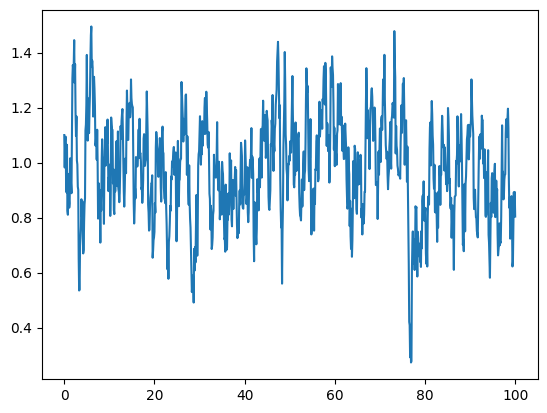

In [3]:
X = np.zeros(t.shape)

X[0] =1.1

for i in range(t.size-1):
    X[i+1] = X[i] + mu * (theta-X[i]) *dt+sigma*np.sqrt(dt)*np.random.normal()


plt.plot(t,X)

In [4]:
def OU(x1, x2, dt,theta, mu, sigma):
    
    sigma0 = sigma**2 * (1 - np.exp(-2*mu*dt)) / (2*mu)
    sigma0 = np.sqrt(sigma0)
    
    prefactor = 1 / np.sqrt(2*np.pi*sigma**2)
    
    f = prefactor * np.exp(-(x2-x1*np.exp(-mu*dt) - \
        theta * (1-np.exp(-mu*dt)))**2 / (2 * sigma0**2))
    
    return f

def log_likelihood_OU(p, X,dt):
    
    theta = p[0]
    mu = p[1]
    sigma = p[2]
    
    
    N = X.size
    
    f = np.zeros( (N-1, ) )
    
    
    for i in range (1, N):
        
        x2 = X[i]
        x1 = X[i-1]
        
        f[i-1] = OU(x1, x2, dt, theta, mu, sigma)
        
    f = np.log(f)
    f = np.sum(f)
        
    return -f  #scipy makes minimum value

def constraint1 (p):
    return p[1]

def constraint2 (p):
    return p[2]


    

In [5]:
cons = (
    
    {'type':'ineq', 'fun':constraint1}, # inequility
    {'type':'ineq', 'fun':constraint2}
    
)

p0 = [1,1,1]

minimize(log_likelihood_OU, p0, args = (X, dt), constraints = cons)

C:\Users\imtig\AppData\Local\Temp\ipykernel_20424\661630537.py:32: RuntimeWarning: divide by zero encountered in log
  f = np.log(f)
C:\Users\imtig\AppData\Local\Temp\ipykernel_20424\661630537.py:3: RuntimeWarning: invalid value encountered in double_scalars
  sigma0 = sigma**2 * (1 - np.exp(-2*mu*dt)) / (2*mu)
C:\Users\imtig\AppData\Local\Temp\ipykernel_20424\661630537.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  f = prefactor * np.exp(-(x2-x1*np.exp(-mu*dt) - \


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 253.1644050775454
       x: [ 8.950e-01  4.243e-03  3.117e-01]
     nit: 32
     jac: [ 1.192e-02  5.625e-03  1.380e-02]
    nfev: 159
    njev: 32

In [6]:
# 책에서 계산한 방식대로

N = X.size

Xx =np.sum(X[0:-1])
Xy = np.sum(X[1:])

Xxx = np.sum(X[0:-1]**2)
Xxy = np.sum(X[0:-1]*X[1:])
Xyy = np.sum(X[1:]**2)

In [7]:
theta0 = (Xy * Xxx - Xx * Xxy) / \
    (N * (Xxx - Xxy) - (Xx ** 2 - Xx * Xy))
    
mu0 = ( Xxy - theta0 * Xx - theta0 * Xy + N* theta0**2) / \
    (Xxx -2*theta0 * Xx + N* theta0**2)

mu0 = -1 / dt*np.log(mu0)

prefactor = 2*mu0 / (N*(1-np.exp(-2*mu0*dt)))

term = Xyy - 2 * np.exp(-mu0 * dt) * Xxy + np.exp(-2 * mu0 * dt) * Xxx - 2 * theta0 * (1 - np.exp(-mu0 * dt)) * (Xy - np.exp(-mu0 * dt) * Xx) + N * (theta0 ** 2) * (1 - np.exp(-mu0 * dt))

#term = Xyy - 2*np.exp(-mu0*dt) * Xxy + np.exp(-2*mu0*dt)* Xxx - 2*theta0 * (1-np.exp(-mu0*dt))(Xy - np.exp(-mu0*dt)*Xx)+N*((theta0)**2)(1-np.exp(-mu0*dt))

sigma02 = prefactor * term

In [8]:
print(theta0)
print(mu)
print(np.sqrt(sigma02))

0.9738715922866101
1.5
1.1970871149486337


In [31]:
def calculate_parameters(x,dt):
    N = X.size
    Xx =np.sum(X[0:-1])
    Xy = np.sum(X[1:])
    
    Xxx = np.sum(X[0:-1]**2)
    Xxy = np.sum(X[0:-1]*X[1:])
    Xyy = np.sum(X[1:]**2)
    
    theta0 = (Xy * Xxx - Xx * Xxy) / \
    (N * (Xxx - Xxy) - (Xx ** 2 - Xx * Xy))
    
    mu0 = ( Xxy - theta0 * Xx - theta0 * Xy + N* theta0**2) / \
    (Xxx -2*theta0 * Xx + N* theta0**2)
    
    mu0 = -1 / dt*np.log(mu0)
    
    prefactor = 2*mu0 / (N*(1-np.exp(-2*mu0*dt)))
    
    term = Xyy - 2 * np.exp(-mu0 * dt) * Xxy + np.exp(-2 * mu0 * dt) * Xxx - 2 * theta0 * (1 - np.exp(-mu0 * dt)) * (Xy - np.exp(-mu0 * dt) * Xx) + N * (theta0 ** 2) * (1 - np.exp(-mu0 * dt))
    
    sigma02 = prefactor * term
    sigma0 = np.sqrt(sigma02)
    
    return theta0, mu0, sigma0

In [42]:
def log_likelihood(parameters, S,dt):
    theta = parameters[0]
    mu = parameters[1]
    sigma = parameters[2]
    
    sigma0 = sigma**2 * (1 - np.exp(-2 * mu * dt)) / (2 * mu)

    sigma0 = np.sqrt(sigma0)
    
    N = S.size
    
    term1 = -0.5*np.log(2*np.pi)
    term2 = -np.log(sigma)
    
    prefactor = -1 / (2*N*sigma0**2)
    sum_term = 0
    
    for i in range (1,N):
        
        x2 = S[i]
        x1 = S[i-1]
        
        sum_term = sum_term + (x2 -x1 *np.exp(-mu*dt) -\
            theta * (1-np.exp(-mu*dt)))**2
        
        f = (term1 + term2 + prefactor *sum_term)
        
        return f

# Determine Pair Ratio 

In [36]:
GDX = pd.read_csv('GDX ETF.csv')
GLD = pd.read_csv('GLD ETF.csv')

# Convert the 'date' column to datetime format and set it as index
GDX['Date'] = pd.to_datetime(GDX['Date'])
GDX.set_index('Date', inplace=True)

# Sort the DataFrame by the index (date) in ascending order
GDX.sort_index(ascending=True, inplace=True)


# Convert the 'date' column to datetime format and set it as index
GLD['Date'] = pd.to_datetime(GLD['Date'])
GLD.set_index('Date', inplace=True)

# Sort the DataFrame by the index (date) in ascending order
GLD.sort_index(ascending=True, inplace=True)


gld = GLD['Price'].to_numpy()
gdx = GDX['Price'].to_numpy()

gld = gld[0:200]
gdx = gdx[0:200]

N = gld.size
dt = 1/252

print(N)

200


In [37]:
GDX

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2006-05-23,37.96,37.75,39.22,37.75,620.90K,1.96%
2006-05-24,36.52,37.13,37.57,35.87,638.60K,-3.79%
2006-05-25,38.32,37.18,38.32,36.98,367.00K,4.93%
2006-05-26,38.55,38.74,38.74,37.77,269.40K,0.60%
2006-05-30,38.17,39.50,39.72,38.11,559.10K,-0.99%
...,...,...,...,...,...,...
2024-04-19,34.07,33.70,34.31,33.70,19.79M,0.95%
2024-04-22,32.53,32.60,33.19,32.43,40.44M,-4.52%
2024-04-23,33.05,32.31,33.15,32.20,24.42M,1.60%


In [43]:
B_over_A = np.linspace(0.001, 1, 1000)
likelihood_gld_gdx = [] # define empty space


for value in B_over_A:
    
    alpha = 1 / gld[0]
    
    beta = value / gdx[0]
    
    X = alpha*gld - beta *gdx
    
    parameters = calculate_parameters(X, dt)
    likelihood_gld_gdx.append(log_likelihood(parameters, X, dt))

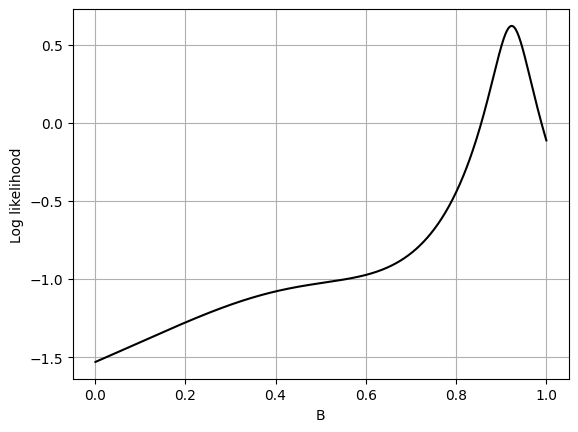

In [46]:
B = B_over_A

plt.plot(B, likelihood_gld_gdx, 'k')
plt.xlabel('B')
plt.ylabel('Log likelihood')
plt.grid()

In [47]:
V = np.amax(likelihood_gld_gdx)

ind = np.where(likelihood_gld_gdx == V)
ind = ind[0]

print(B[ind])

[0.923]


In [48]:
price_diff = GLD['Price'] - 0.923 * GDX['Price']
price_diff.plot()